In [2]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector, Operator, DensityMatrix
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere, plot_distribution, plot_state_city
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2 as Estimator
from qiskit.providers.basic_provider import BasicProvider
from qiskit.circuit.library import UGate
backend = BasicProvider().get_backend('basic_simulator')
import numpy as np
from numpy import sqrt, pi, random

from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke, FakeKyiv

## Plan of the module 2:

1. Deutsch (D) algorithm overview
2. Deutsch algorithm - implementation using quantum composer (https://quantum.ibm.com/composer/files/new)
3. Deutsch-Jozsa(DJ) algorithm and it's implementation using quantum composer
4. Implementation of D and DJ alghoritms with Qiskit code
5. Classical evaluation of functions
6. Homework

# I. Deutsch algorithm
* Theoretical explanation and proof.
* implementation in quantum composer and Qiskit.

##  I.1. Excercise:
1. Create quantum circuits coresponding to oracles representing function f: $\{0,1\}\to\{0,1\}$ which is either constatnt or balanced (4 different possibilities)
2. Check clasically if the function is constat or balanced
3. Implement Deutch alghoritm for each of the oracle
4. Reaize above tasks:
    * using quantum composer
    * qiskit and perfect noisless simulator (e.g. using ```StatevectorSampler``` class)
    * qiskit and one of the noisy simulators (fake providers https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider e.g. using ```FakeKyiv```,  ```FakeSherbrooke```,  ```FakeBrisbane```)


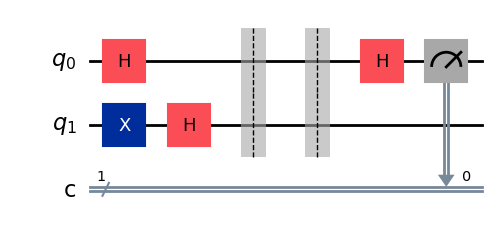

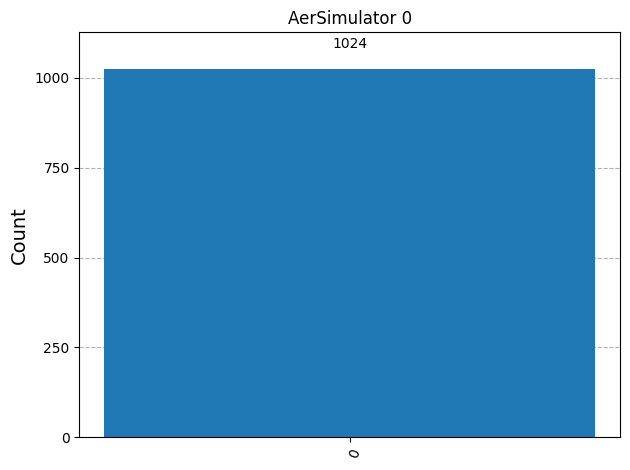

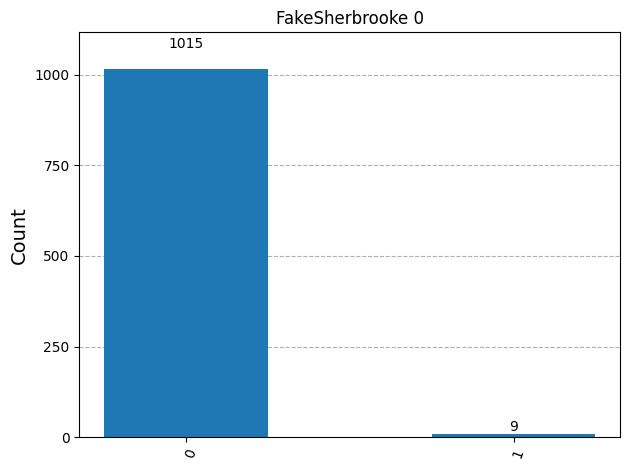

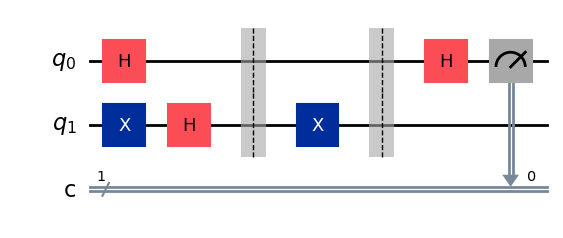

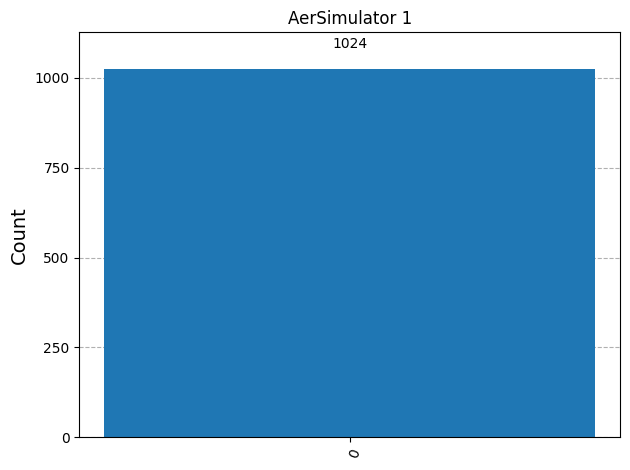

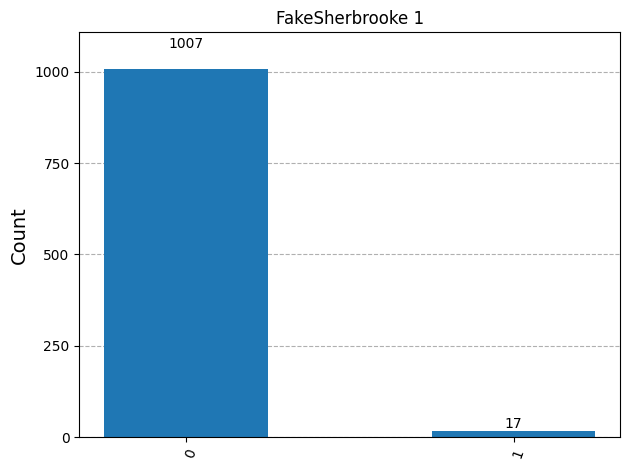

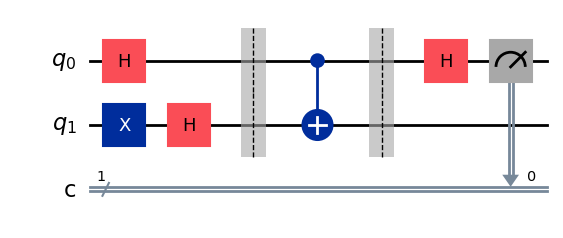

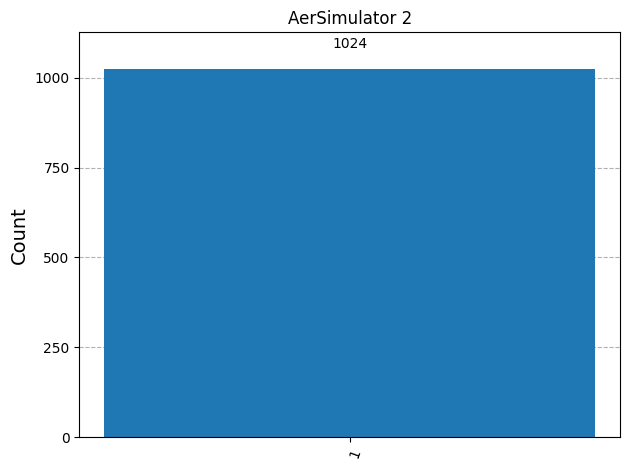

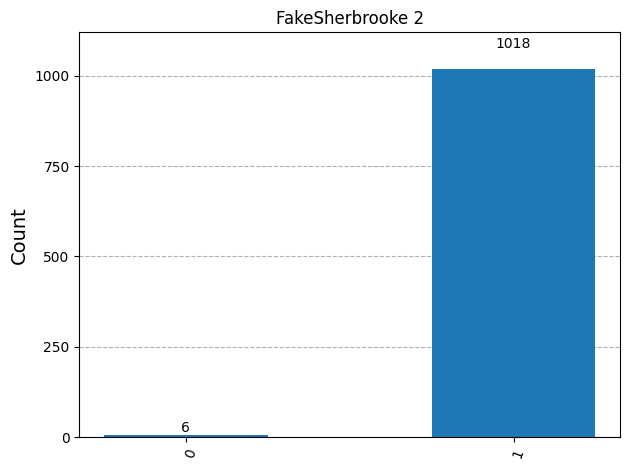

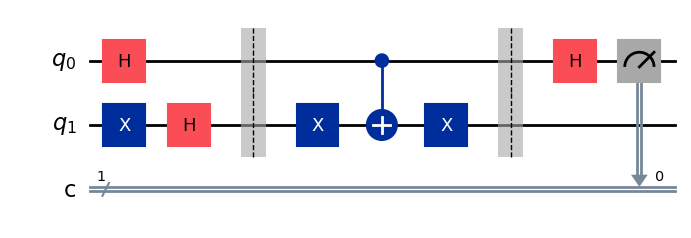

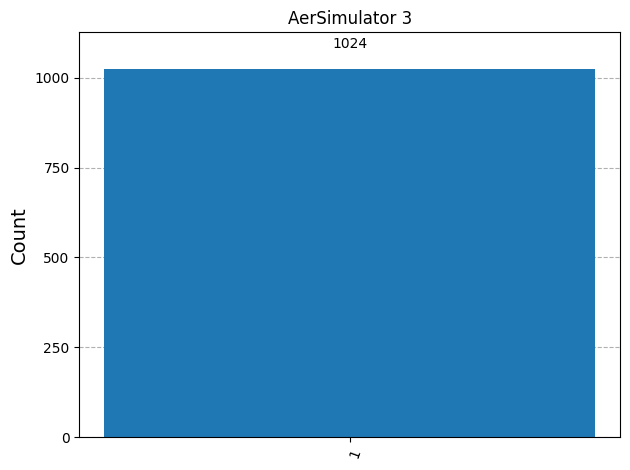

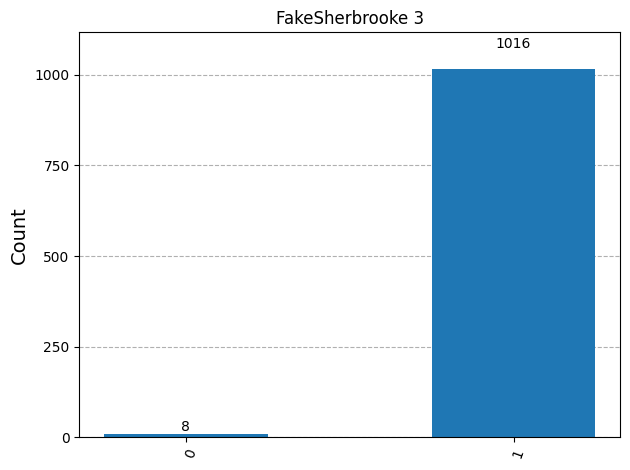

In [ ]:
def get_oracles():
  qcs = []

  qc = QuantumCircuit(2, 1)
  qc.barrier()
  qc.h(0)
  qc.measure(0, 0)
  qcs.append(qc)

  qc = QuantumCircuit(2, 1)
  qc.x(1)
  qc.barrier()
  qc.h(0)
  qc.measure(0, 0)
  qcs.append(qc)

  qc = QuantumCircuit(2, 1)
  qc.cx(0, 1)
  qc.barrier()
  qc.h(0)
  qc.measure(0, 0)
  qcs.append(qc)

  qc = QuantumCircuit(2, 1)
  qc.x(1)
  qc.cx(0, 1)
  qc.x(1)
  qc.barrier()
  qc.h(0)
  qc.measure(0, 0)
  qcs.append(qc)

  return qcs

def get_quantum_start():
  qc = QuantumCircuit(2, 1)
  qc.h(0)
  qc.x(1)
  qc.h(1)
  qc.barrier()
  return qc

def test_oracles(qcs):
  assert(len(qcs) == 4)
  # add prefixes
  for idx, qc in enumerate(qcs):
    new_qc = get_quantum_start().compose(qc)
    result = AerSimulator().run(new_qc).result()
    statistics = result.get_counts()
    display(new_qc.draw(output="mpl"))
    display(plot_histogram(statistics, title=f'AerSimulator {idx}'))

    result = FakeSherbrooke().run(new_qc).result()
    statistics = result.get_counts()
    # display(new_qc.draw(output="mpl"))
    display(plot_histogram(statistics, title=f'FakeSherbrooke {idx}'))

qcs = get_oracles()
test_oracles(qcs)

# II Deutsch-Jozsa algorithm
* Theoretical explanation and proof.
* implementation in quantum composer and Qiskit.

In a case of 2 input qubits, we have 16 possible binary functions $f: \{0,1\}^2\to\{0,1\}$.
Each of them gives 0 or 1 for one of 4 possible input sequences: 00, 01, 10, 11.

We'll use quantum composer to implement Deutsch-Jozsa algorithms for various Oracle functions.

Let's implement Deutch-Jozsa function which assignes 0,1,1,0 to each of the possible input sequences of two bits (respectively 00, 01, 10, 11). 

This is the function of adding modulo 2.

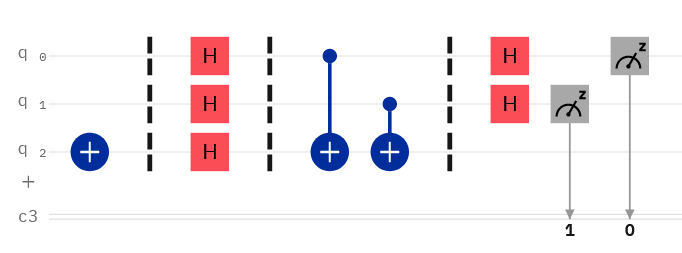

## Exercise 2.1: 
* Create the above circuit in quantum composer
* Verify based on the results of running this circuit, that the oracle function is balanced
* Prove, that the two CNOT gates indeed implement actually the 0110 function (adding modulo 2)

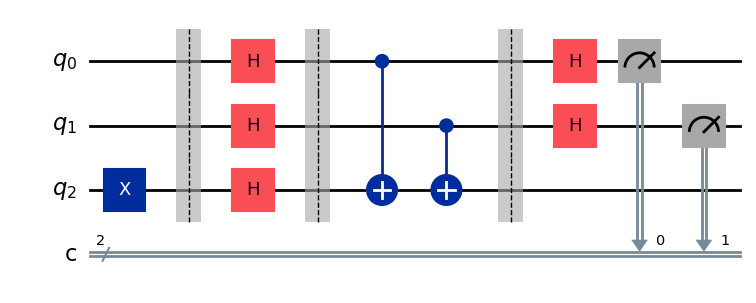

expected results: 00 - constant, {01, 10, 11} - balanced


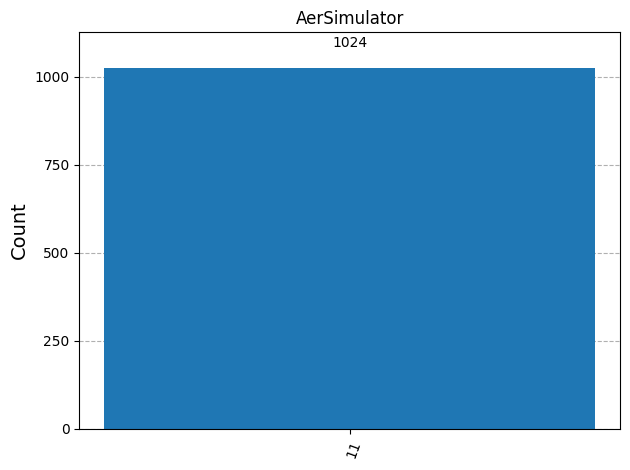

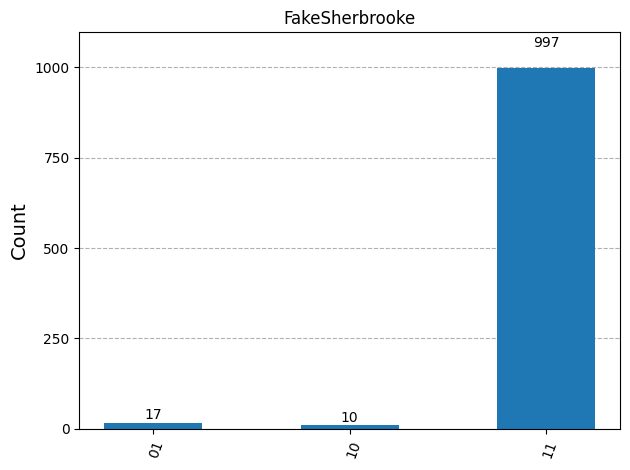

In [13]:
def get_dj_circuit():
  qc = QuantumCircuit(3, 2)
  qc.x(2)
  qc.barrier()
  qc.h(0)
  qc.h(1)
  qc.h(2)
  qc.barrier()
  qc.cx(0, 2)
  qc.cx(1, 2)
  qc.barrier()
  qc.h(0)
  qc.h(1)
  qc.measure(0, 0)
  qc.measure(1, 1)
  return qc

qc = get_dj_circuit()
display(qc.draw(output="mpl"))

print("expected results: 00 - constant, {01, 10, 11} - balanced")

result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='AerSimulator'))

result = FakeSherbrooke().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='FakeSherbrooke'))


testing 0 + 0 = 0 mod 2


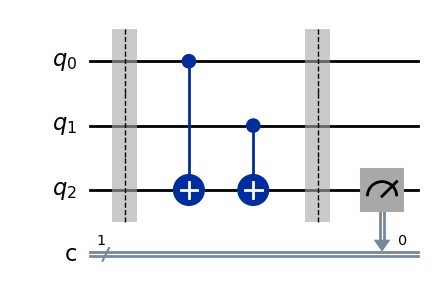

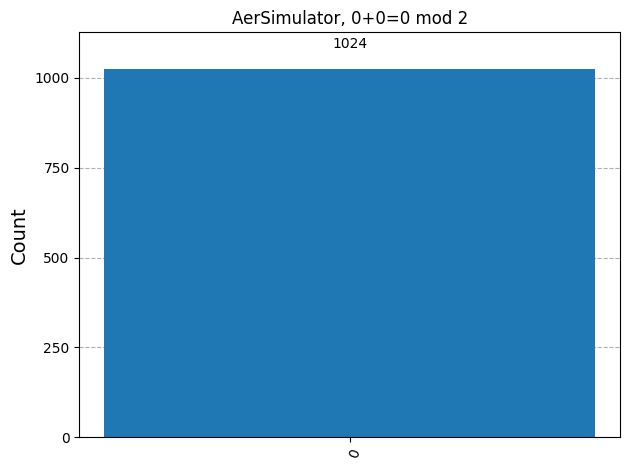

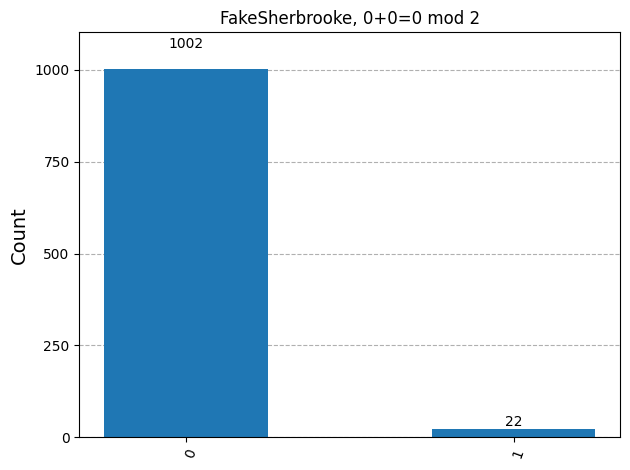

testing 0 + 1 = 1 mod 2


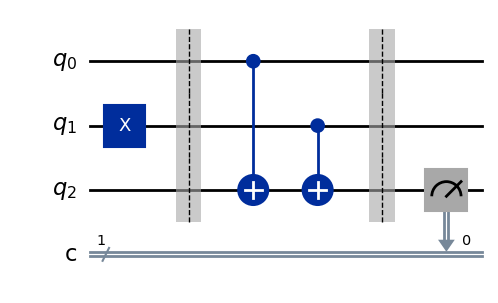

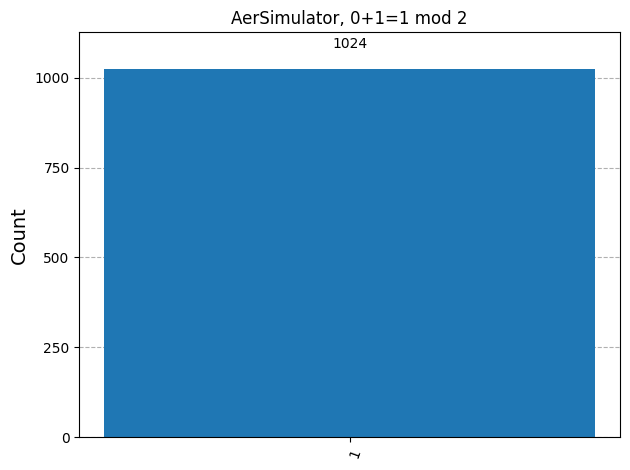

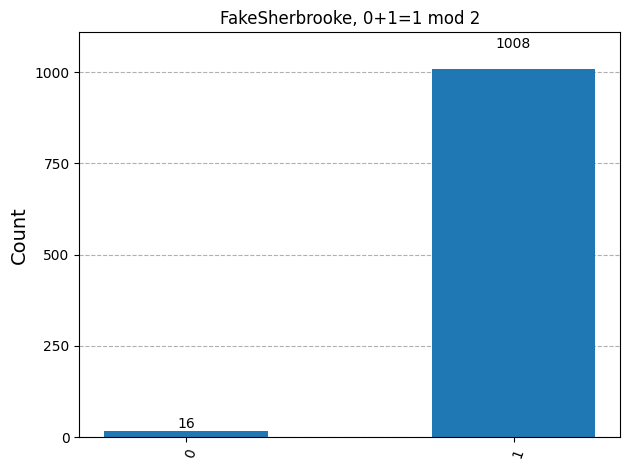

testing 1 + 0 = 1 mod 2


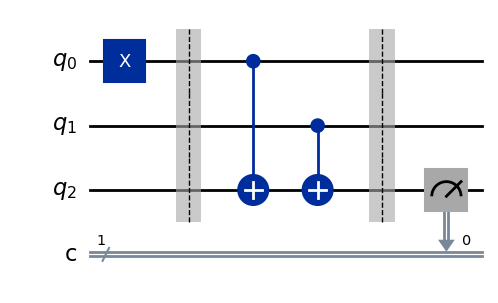

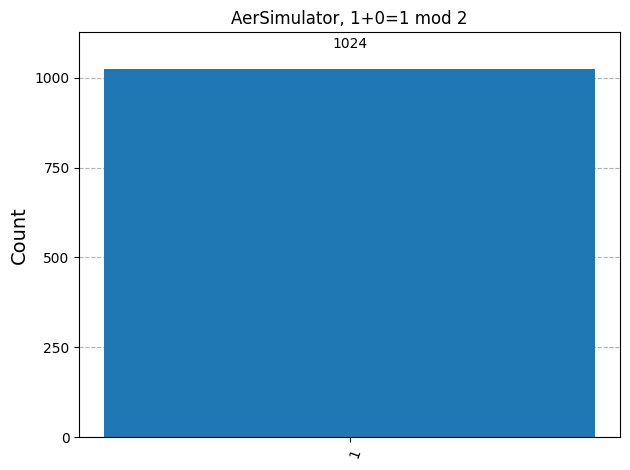

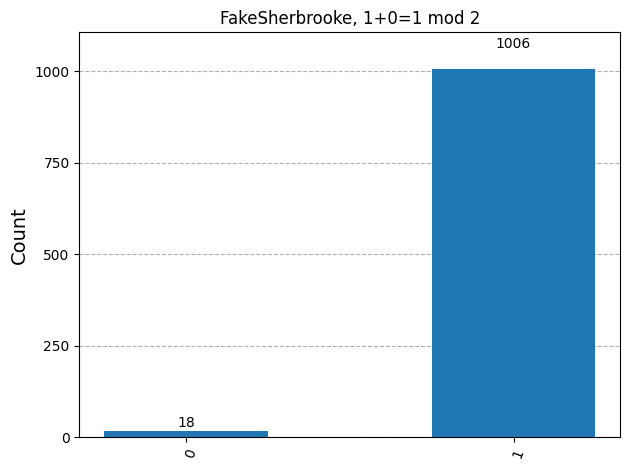

testing 1 + 1 = 0 mod 2


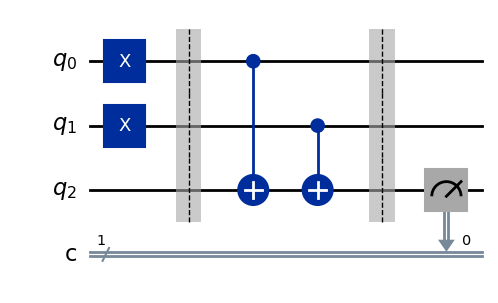

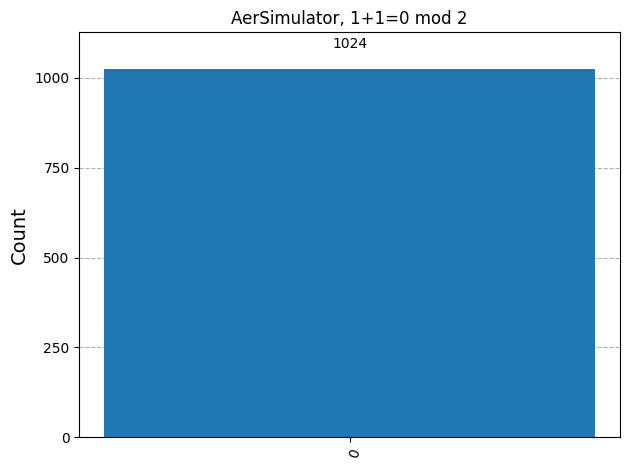

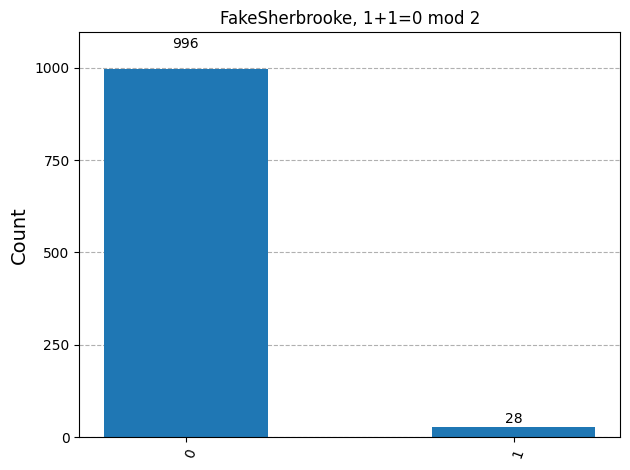

In [23]:
def test_xor_input(x0, x1):
  qc = QuantumCircuit(3, 1)
  if x0 == 1:
    qc.x(0)
  if x1 == 1:
    qc.x(1)
  qc.barrier()
  qc.cx(0, 2)
  qc.cx(1, 2)
  qc.barrier()

  qc.measure(2, 0)
  return qc

for x0 in [0, 1]:
  for x1 in [0, 1]:
    print(f"testing {x0} + {x1} = {(x0 + x1) % 2} mod 2")
    qc = test_xor_input(x0, x1)
    display(qc.draw(output="mpl"))
    
    result = AerSimulator().run(qc).result()
    statistics = result.get_counts()
    display(plot_histogram(statistics, title=f'AerSimulator, {x0}+{x1}={(x0 + x1) % 2} mod 2'))

    result = FakeSherbrooke().run(qc).result()
    statistics = result.get_counts()
    display(plot_histogram(statistics, title=f'FakeSherbrooke, {x0}+{x1}={(x0 + x1) % 2} mod 2'))

## Exercise 2.2: 
Create a Deutsch-Jozsa circuit where oracle function acting on two qubits has values 0,1,0,1 respectively for 00, 01, 10, 11 as input.

expected results: 00 - constant, {01, 10, 11} - balanced
note, 0101 is balanced


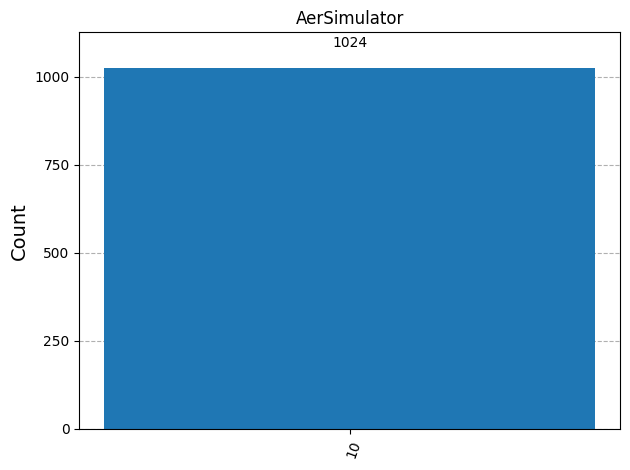

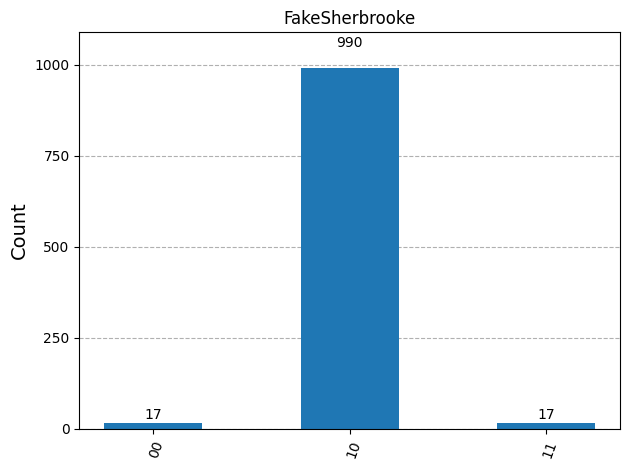

In [26]:
def deutsch_jozsa_0101():
  qc = QuantumCircuit(3, 2)

  # Step 1: Initialize ancilla qubit to |1⟩ and apply Hadamards
  qc.x(2)
  qc.h([0, 1, 2])

  # Step 2: Oracle for f(x) = x₁ (0101)
  qc.cx(1, 2)

  # Step 3: Apply Hadamards again to input qubits
  qc.h([0, 1])

  # Step 4: Measure input qubits
  qc.measure(0, 0)
  qc.measure(1, 1)

  return qc

print("expected results: 00 - constant, {01, 10, 11} - balanced")
print("note, 0101 is balanced")

qc = deutsch_jozsa_0101()
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='AerSimulator'))

result = FakeSherbrooke().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='FakeSherbrooke'))

## Exercise 2.3:
Create Deutsch-Jozsa circuit implementing the two possible constant functions as an oracle.

testing constant zero, expecting 00


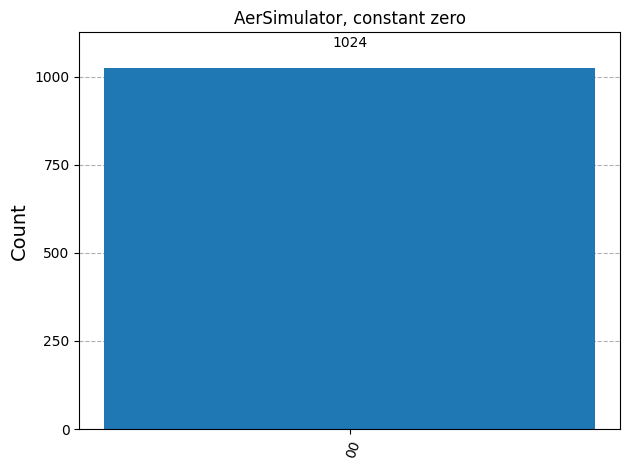

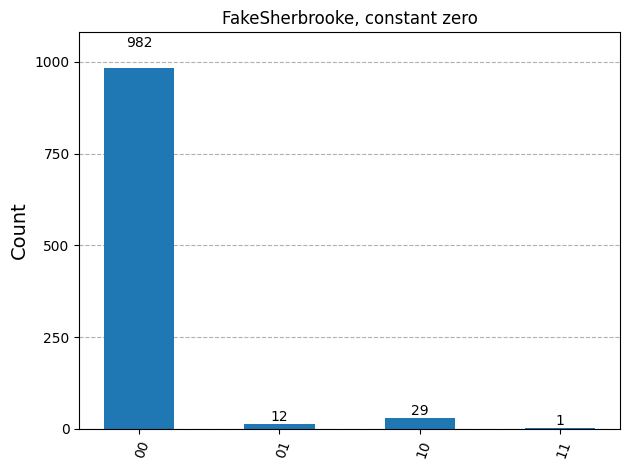

testing constant one, expecting 00


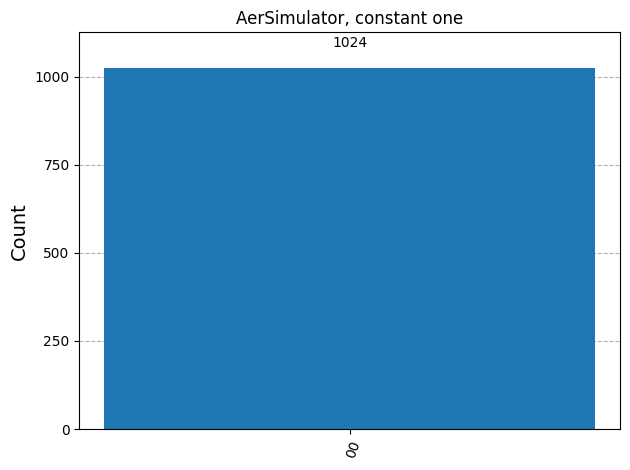

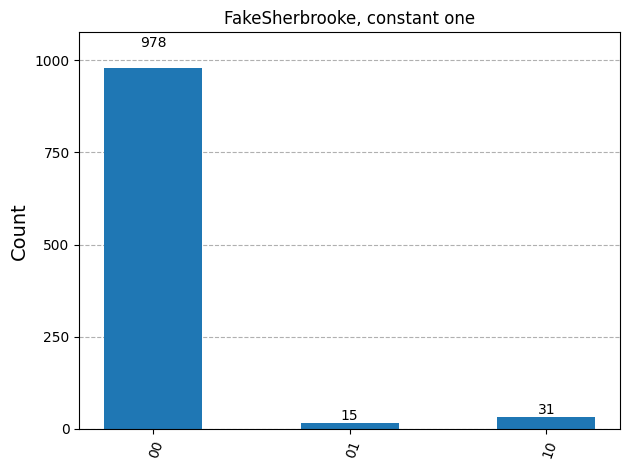

In [28]:
def constant_zero():
  qc = QuantumCircuit(3, 2)

  qc.x(2)

  qc.h(0)
  qc.h(1)
  qc.h(2)

  # Do nothing

  qc.h(0)
  qc.h(1)

  qc.measure(0, 0)
  qc.measure(1, 1)

  return qc

def constant_one():
  qc = QuantumCircuit(3, 2)

  qc.x(2)

  qc.h(0)
  qc.h(1)
  qc.h(2)

  qc.x(2)

  qc.h(0)
  qc.h(1)

  qc.measure(0, 0)
  qc.measure(1, 1)

  return qc

qc = constant_zero()
print("testing constant zero, expecting 00")
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='AerSimulator, constant zero'))

result = FakeSherbrooke().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='FakeSherbrooke, constant zero'))

qc = constant_one()
print("testing constant one, expecting 00")
result = AerSimulator().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='AerSimulator, constant one'))

result = FakeSherbrooke().run(qc).result()
statistics = result.get_counts()
display(plot_histogram(statistics, title='FakeSherbrooke, constant one'))

## Exercise 2.4:
Following tutorial (https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-deutsch-jozsa-problem see ```dj_query``` for details) implement random cricuit coresponding to oracles representing function f: $\{0,1\}^3\to\{0,1\}$ which is either constatnt or balanced 

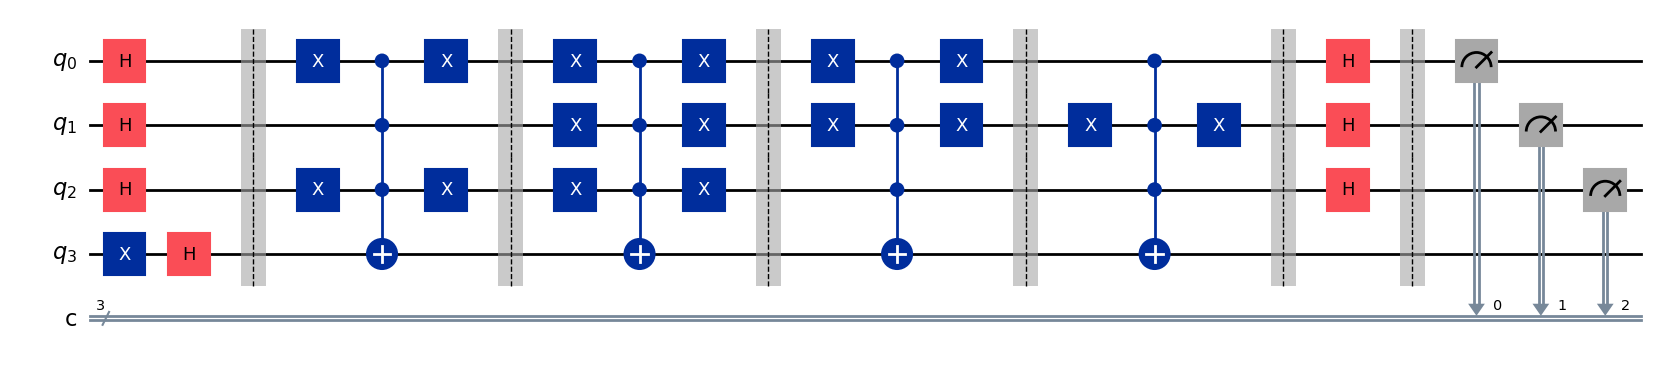

measured 110


'balanced'

In [67]:
def dj_query(num_qubits):
  # Create a circuit implementing for a query gate for a random function
  # satisfying the promise for the Deutsch-Jozsa problem.

  qc = QuantumCircuit(num_qubits + 1)

  if np.random.randint(0, 2):
    # Flip output qubit with 50% chance
    qc.barrier()
    qc.x(num_qubits)
  if np.random.randint(0, 2):
    # return constant circuit with 50% chance
    qc.barrier()
    return qc

  # Choose half the possible input strings
  on_states = np.random.choice(
    range(2**num_qubits),  # numbers to sample from
    2**num_qubits // 2,  # number of samples
    replace=False,  # makes sure states are only sampled once
  )

  def add_cx(qc, bit_string):
    for qubit, bit in enumerate(reversed(bit_string)):
      if bit == "1":
        qc.x(qubit)
    return qc

  for state in on_states:
    qc.barrier()  # Barriers are added to help visualize how the functions are created.
    qc = add_cx(qc, f"{state:0b}")
    qc.mcx(list(range(num_qubits)), num_qubits)
    qc = add_cx(qc, f"{state:0b}")

  qc.barrier()

  return qc

def compile_full_circuit(function: QuantumCircuit):
  # Compiles a circuit for use in the Deutsch-Jozsa algorithm.

  n = function.num_qubits - 1
  qc = QuantumCircuit(n + 1, n)
  qc.x(n)
  qc.h(range(n + 1))
  qc.compose(function, inplace=True)
  qc.h(range(n))
  qc.barrier()
  qc.measure(range(n), range(n))
  display(qc.draw("mpl"))
  return qc

def dj_algorithm(function: QuantumCircuit):
  # Determine if a function is constant or balanced.

  qc = compile_full_circuit(function)

  result = AerSimulator().run(qc, shots=1, memory=True).result()
  measurements = result.get_memory()
  print(f"measured {measurements[0]}")
  if "1" in measurements[0]:
    return "balanced"
  return "constant"

f = dj_query(3)
display(dj_algorithm(f))


## Exercise 2.5:
Run all above "DJ" circuits using ideal (noisless) and noisy simulator (e.g. using ```FakeKyiv```,  ```FakeSherbrooke``` or ```FakeBrisbane```) and veryfy that the oracle functions is either balanced or constant.
Furthermore test classicaly if the oracles corespond to constant or balanced functions.


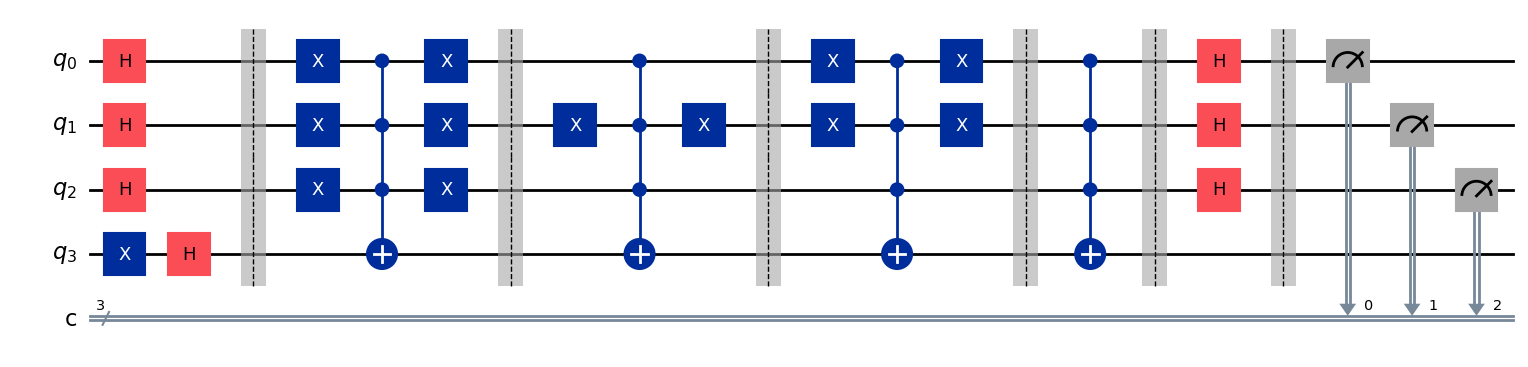

expected results: 000 - constant, other - balanced


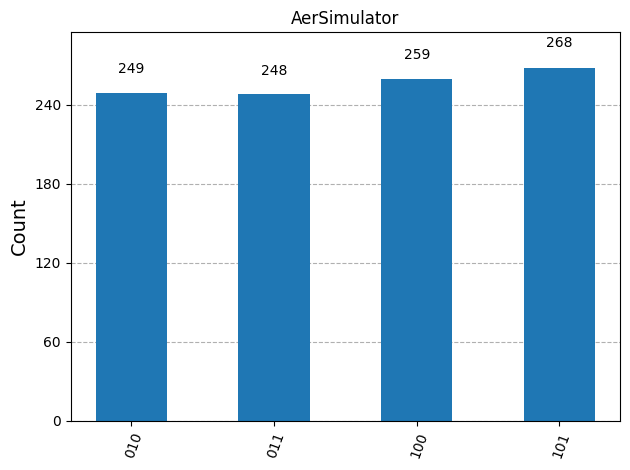

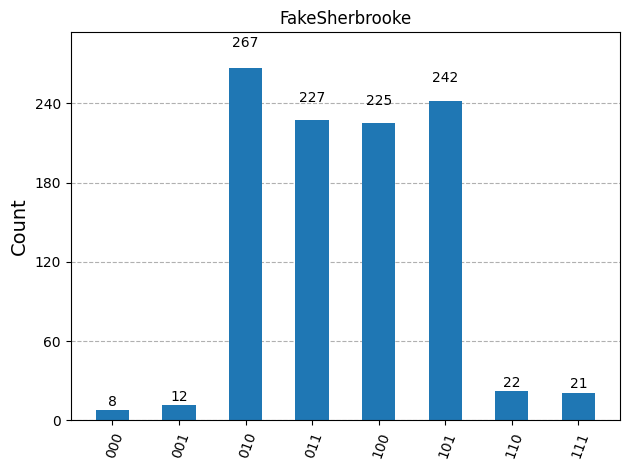

None

In [69]:
def dj_algorithm_full_test(function: QuantumCircuit):
  qc = compile_full_circuit(function)

  print("expected results: 000 - constant, other - balanced")
  result = AerSimulator().run(qc).result()
  statistics = result.get_counts()
  display(plot_histogram(statistics, title='AerSimulator'))

  result = FakeSherbrooke().run(qc).result()
  statistics = result.get_counts()
  display(plot_histogram(statistics, title='FakeSherbrooke'))

f = dj_query(3)
display(dj_algorithm_full_test(f))

# Homework 1
Finish excersies from today's labs

# Homework 2

Get familiar with announcements from one of the Quantum Summits: https://newsroom.ibm.com/2022-11-09-IBM-Unveils-400-Qubit-Plus-Quantum-Processor-and-Next-Generation-IBM-Quantum-System-Two